Python Project


Sleep, Health, and Lifestyle Dataset from Kaggle
https://www.kaggle.com/datasets/henryshan/sleep-health-and-lifestyle?resource=download

Variables dictionary-

Person ID: A unique identifier for each participant.
Gender: The participant's gender (Male/Female).
Age: The participant's age in years.
Occupation: The job or career of the participant.
Sleep Duration (hours): The daily sleep duration of the participant in hours.
Quality of Sleep (scale: 1-10): A subjective assessment of sleep quality on a scale from 1 to 10.
Physical Activity Level (minutes/day): The daily duration of physical activity for the participant, measured in minutes.
Stress Level (scale: 1-10): A subjective assessment of the participant's stress level on a scale from 1 to 10.
BMI Category: The participant's BMI classification (e.g., Underweight, Normal, Overweight).
Blood Pressure (systolic/diastolic): The participant's blood pressure, represented as systolic pressure over diastolic pressure.
Heart Rate (bpm): The participant's resting heart rate, measured in beats per minute.
Daily Steps: The number of steps the participant takes each day.
Sleep Disorder: The presence or absence of a sleep disorder in the participant (None, Insomnia, Sleep Apnea).

In [14]:
pip install pandas numpy matplotlib seaborn scipy

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [16]:
sleep_health_data = pd.read_csv('ss.csv')

In [17]:
sleep_health_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
sleep_health_data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,187.000000,42.139410,7.129491,7.308311,59.128686,5.391421,70.171582,6816.353887
std,107.820066,8.640793,0.795139,1.195359,20.842589,1.772590,4.139704,1620.060932
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.000000,35.000000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.000000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.000000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,373.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [7]:
sleep_health_data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

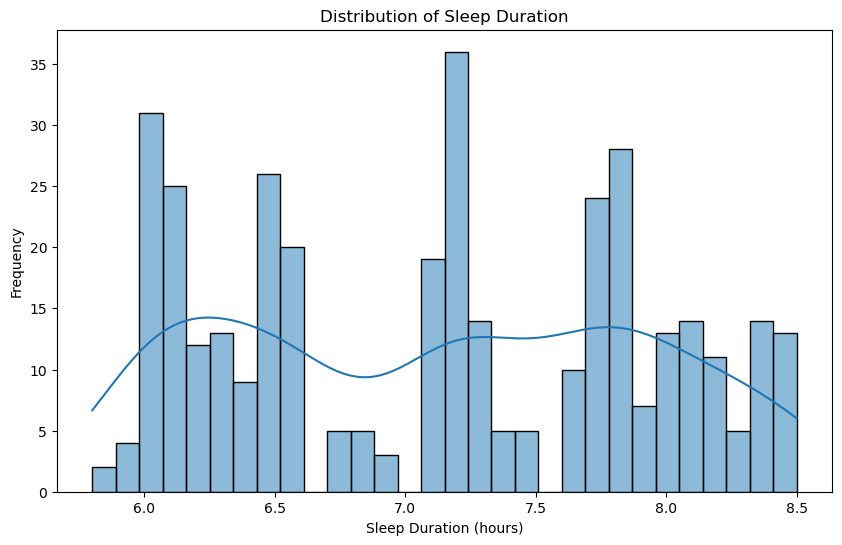

In [8]:
# Distribution of sleep duration
plt.figure(figsize=(10, 6))
sns.histplot(sleep_health_data['Sleep Duration'], kde=True, bins=30)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

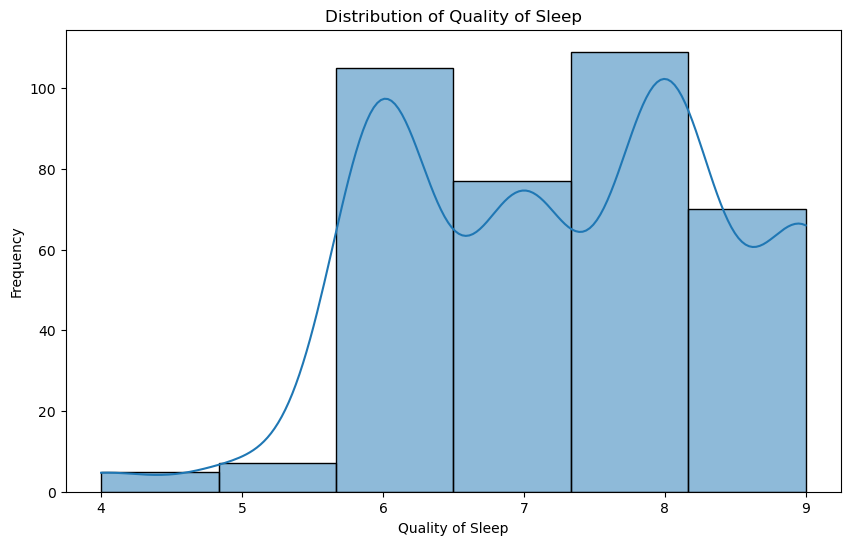

In [9]:
# Distribution of Quality of Sleep
plt.figure(figsize=(10, 6))
sns.histplot(sleep_health_data['Quality of Sleep'], kde=True, bins=6)
plt.title('Distribution of Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()

In [10]:
sleep_health_data.columns = sleep_health_data.columns.str.strip()

sleep_health_data['Sleep Duration'] = pd.to_numeric(sleep_health_data['Sleep Duration'], errors='coerce')
sleep_health_data['Quality of Sleep'] = pd.to_numeric(sleep_health_data['Quality of Sleep'], errors='coerce')
sleep_health_data['Physical Activity Level'] = pd.to_numeric(sleep_health_data['Physical Activity Level'], errors='coerce')
sleep_health_data['Stress Level'] = pd.to_numeric(sleep_health_data['Stress Level'], errors='coerce')
sleep_health_data['Daily Steps'] = pd.to_numeric(sleep_health_data['Daily Steps'], errors='coerce')

pearson_corr = sleep_health_data[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Daily Steps']].corr(method='pearson')

spearman_corr = sleep_health_data[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Daily Steps']].corr(method='spearman')

print("Pearson Correlation Matrix:")
print(pearson_corr)
print("\nSpearman Correlation Matrix:")
print(spearman_corr)


Pearson Correlation Matrix:
                         Sleep Duration  Quality of Sleep  \
Sleep Duration                 1.000000          0.882717   
Quality of Sleep               0.882717          1.000000   
Physical Activity Level        0.210458          0.190675   
Stress Level                  -0.810207         -0.898239   
Daily Steps                   -0.039983          0.016407   

                         Physical Activity Level  Stress Level  Daily Steps  
Sleep Duration                          0.210458     -0.810207    -0.039983  
Quality of Sleep                        0.190675     -0.898239     0.016407  
Physical Activity Level                 1.000000     -0.031490     0.773105  
Stress Level                           -0.031490      1.000000     0.187697  
Daily Steps                             0.773105      0.187697     1.000000  

Spearman Correlation Matrix:
                         Sleep Duration  Quality of Sleep  \
Sleep Duration                 1.000000       

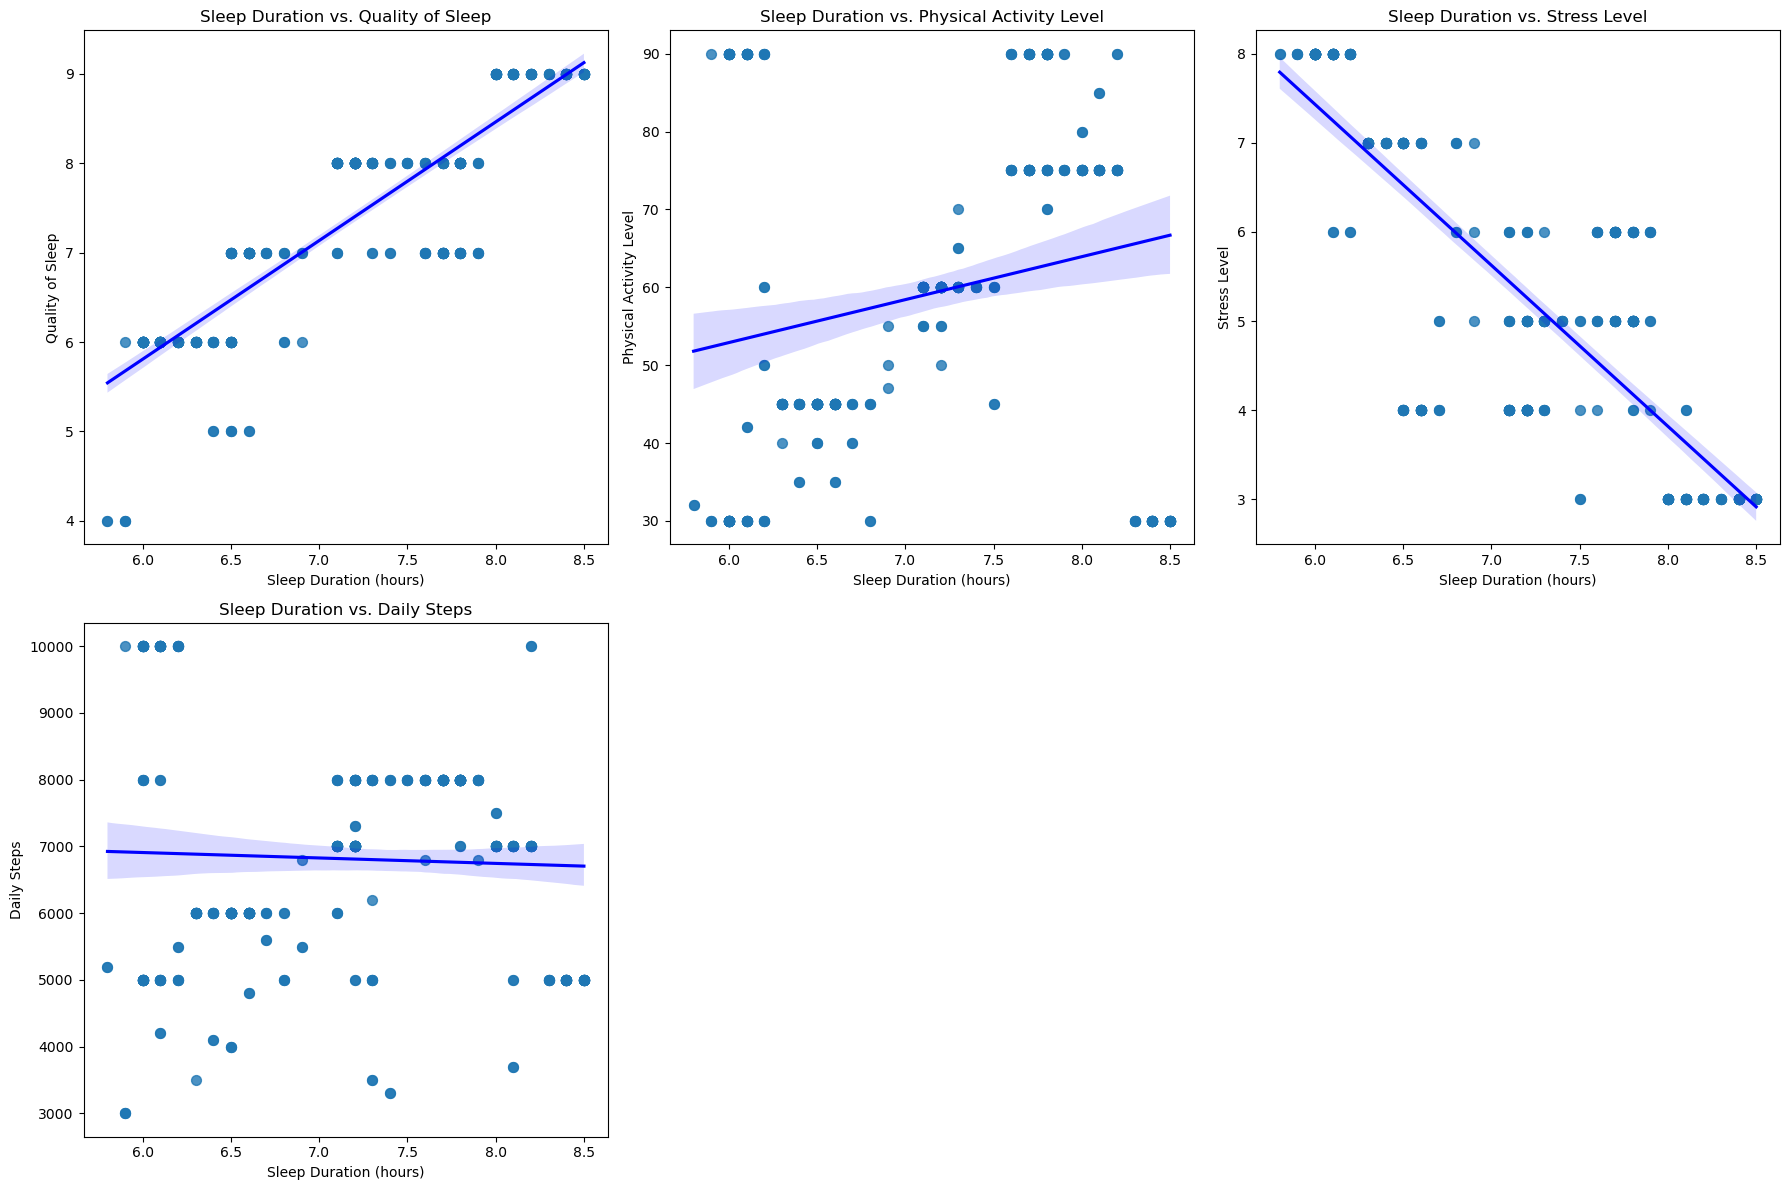

In [11]:
columns = ['Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Daily Steps']

plt.figure(figsize=(18, 12))
for i, column in enumerate(columns):
    plt.subplot(2, 3, i+1)  

    sns.regplot(x='Sleep Duration', y=column, data=sleep_health_data, scatter_kws={'s':50}, line_kws={'color':'blue'})
    plt.title(f'Sleep Duration vs. {column}')
    plt.xlabel('Sleep Duration (hours)')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


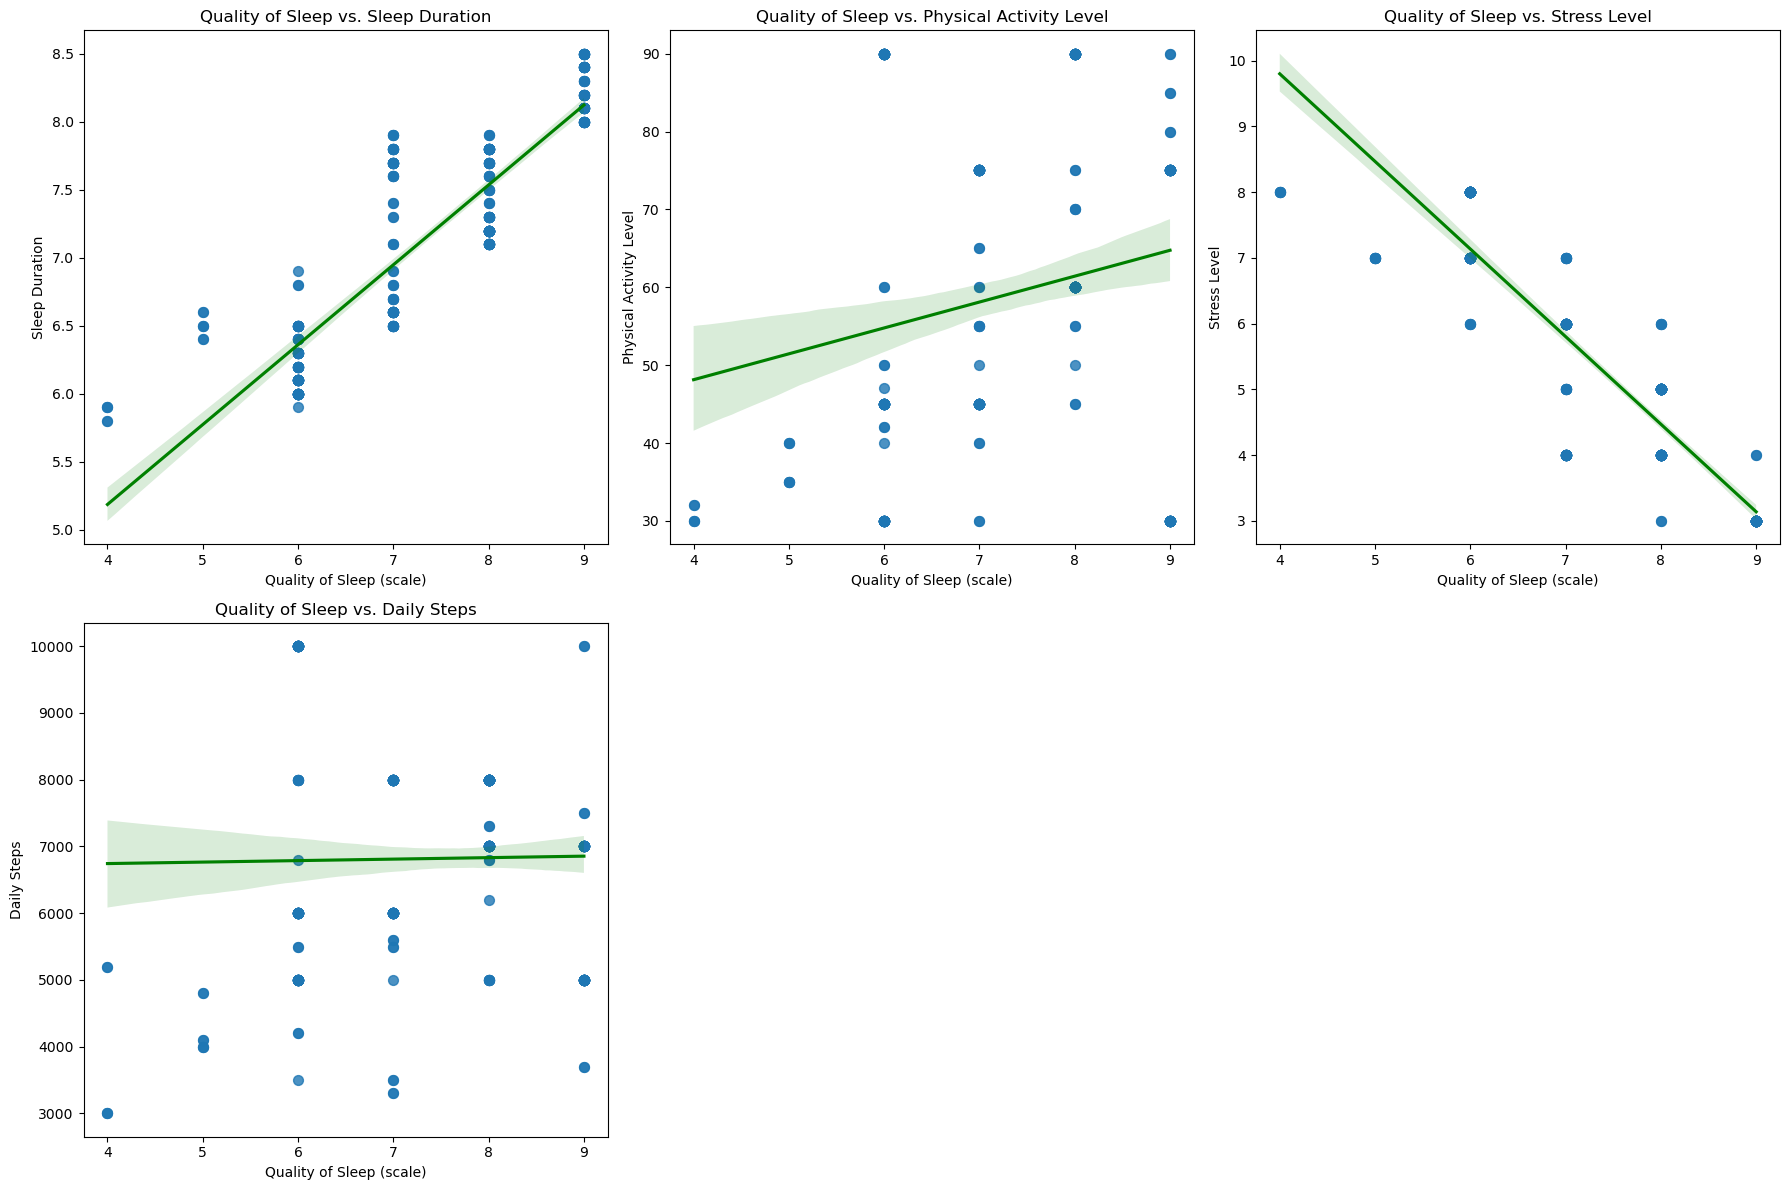

In [12]:
columns = ['Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Daily Steps']

plt.figure(figsize=(18, 12))
for i, column in enumerate(columns):
    plt.subplot(2, 3, i+1)
    
    sns.regplot(x='Quality of Sleep', y=column, data=sleep_health_data, scatter_kws={'s':50}, line_kws={'color':'green'})
    plt.title(f'Quality of Sleep vs. {column}')
    plt.xlabel('Quality of Sleep (scale)')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


In [13]:
# Filter DataFrame to include only rows where Quality of Sleep is 9
best_quality_sleep = sleep_health_data[sleep_health_data['Quality of Sleep'] == 9]

health_columns = ['Sleep Duration', 'Physical Activity Level', 'Daily Steps', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Sleep Disorder']
print(best_quality_sleep[health_columns])

     Sleep Duration  Physical Activity Level  Daily Steps  Stress Level  \
149             8.0                       80         7500             3   
150             8.0                       80         7500             3   
276             8.1                       85         3700             3   
277             8.1                       85         3700             3   
279             8.3                       30         5000             3   
..              ...                      ...          ...           ...   
368             8.1                       75         7000             3   
369             8.1                       75         7000             3   
370             8.0                       75         7000             3   
371             8.1                       75         7000             3   
372             8.1                       75         7000             3   

      BMI Category Blood Pressure  Heart Rate Sleep Disorder  
149  Normal Weight         115/78   

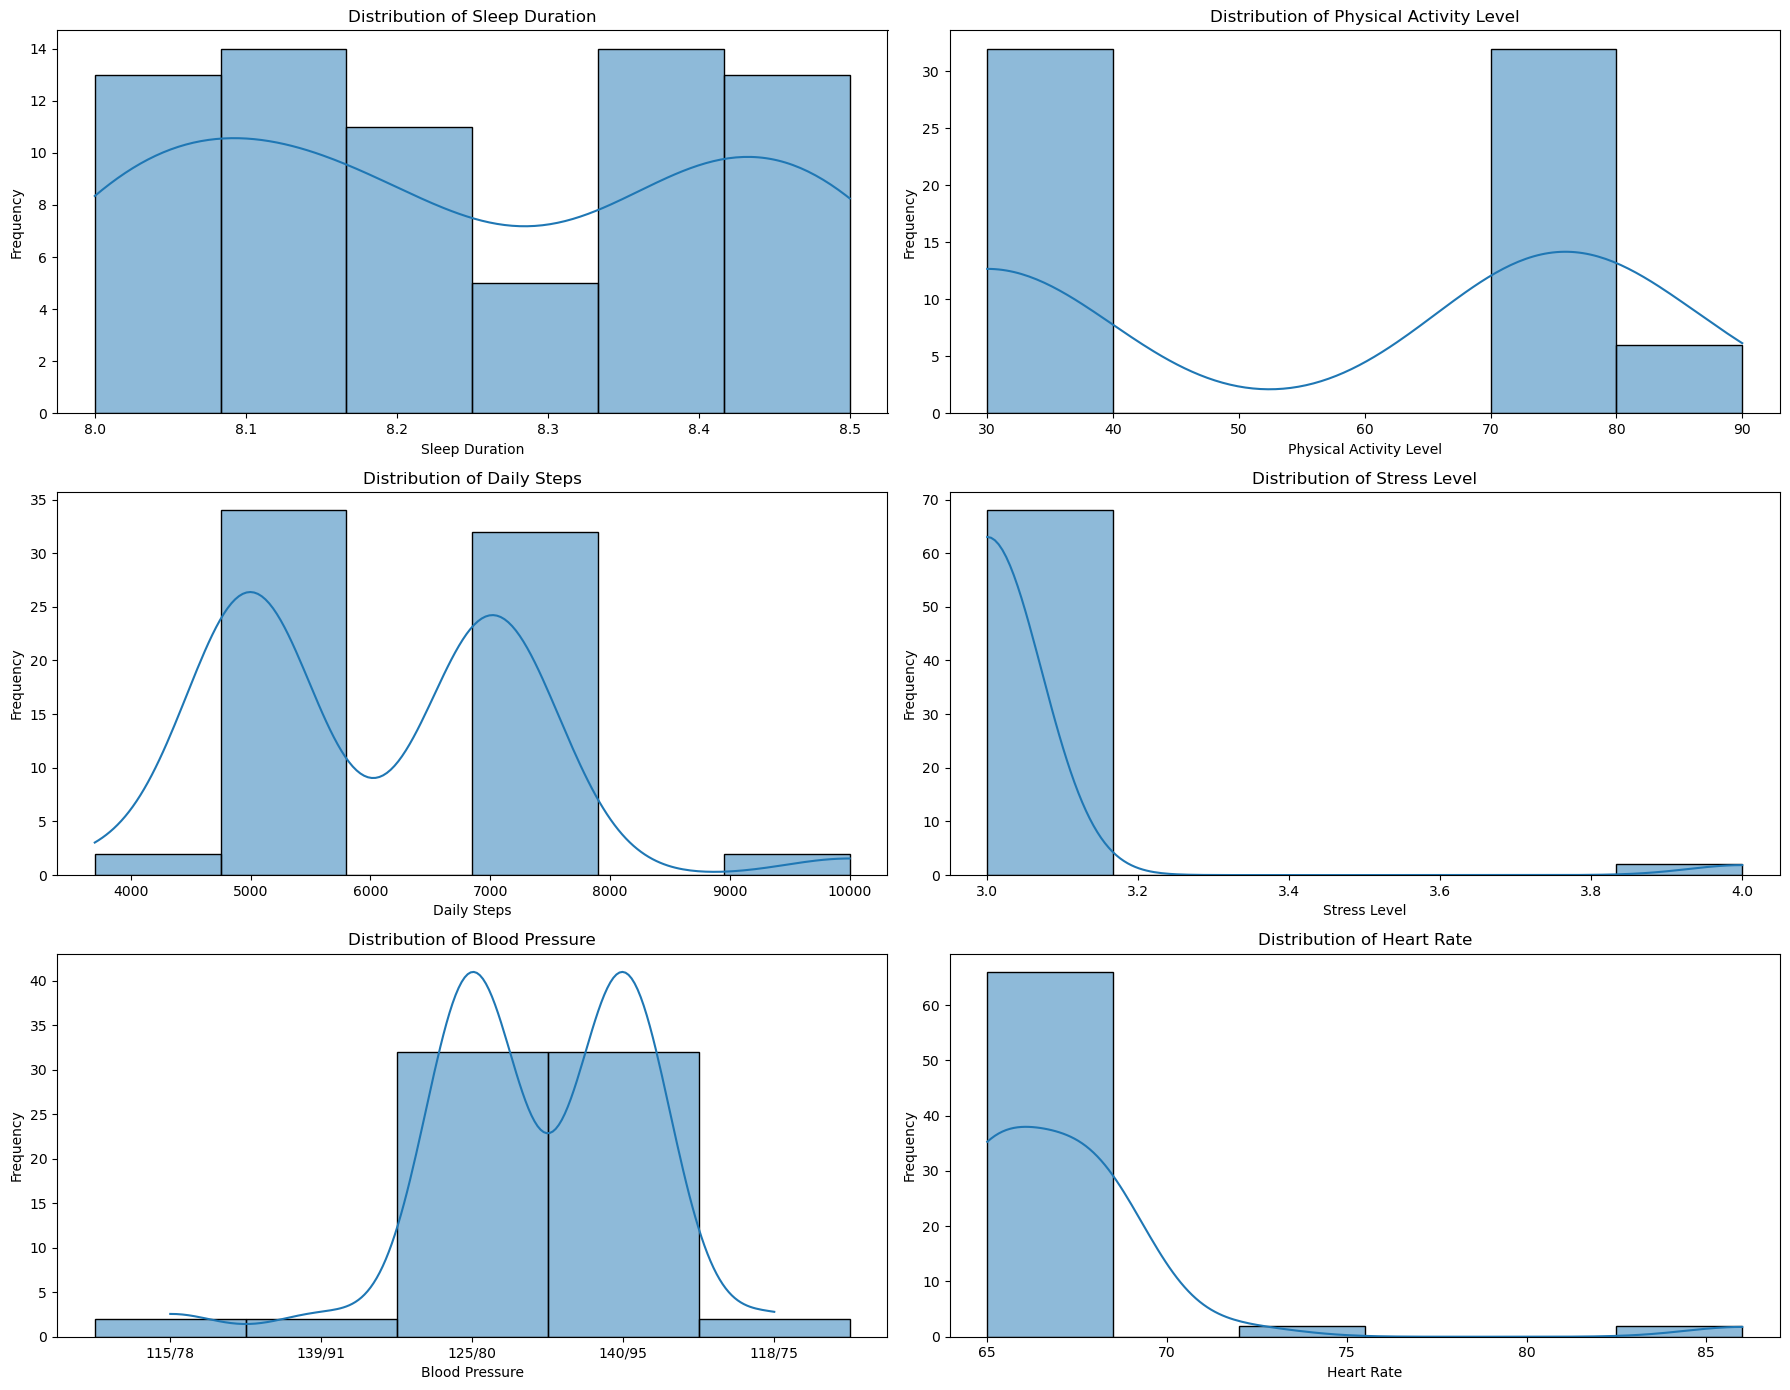

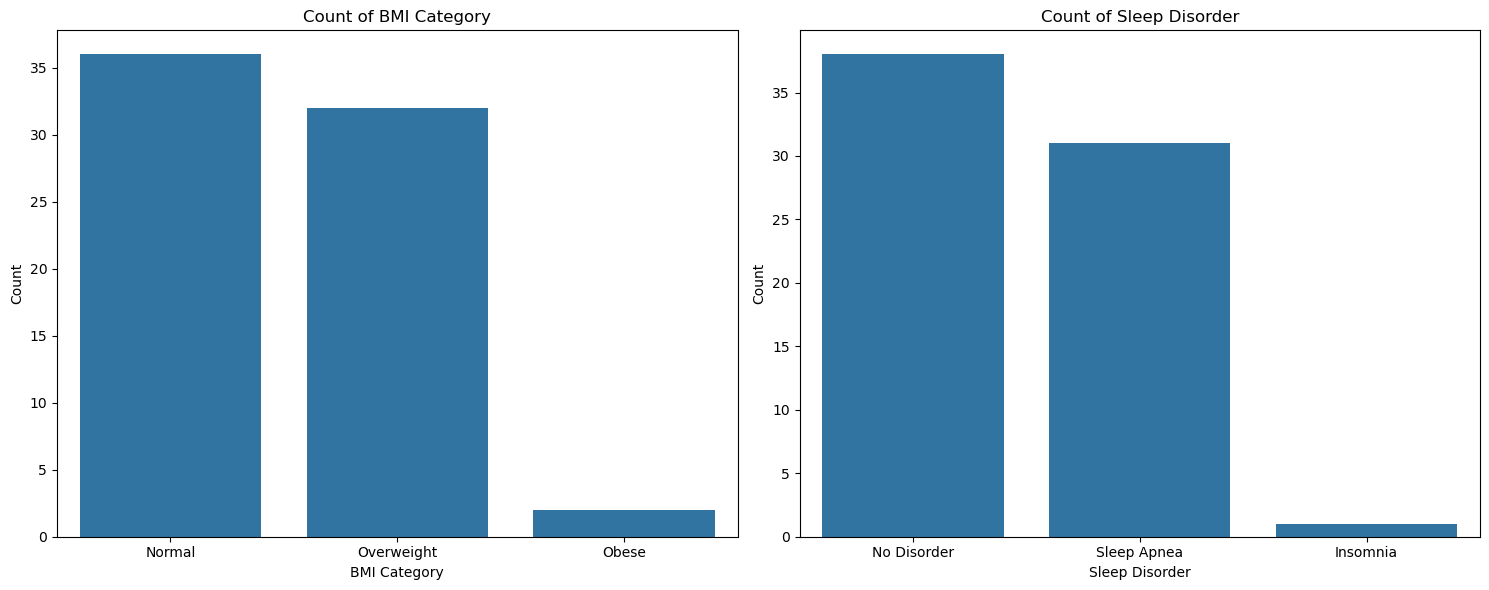

In [32]:
best_quality_sleep = sleep_health_data[sleep_health_data['Quality of Sleep'] == 9].copy()

# Combine 'Normal' and 'Normal Weight' into a single category 'Normal'
best_quality_sleep['BMI Category'] = best_quality_sleep['BMI Category'].replace({
    'Normal Weight': 'Normal',
    'Normal': 'Normal'
})

best_quality_sleep.loc[:, 'BMI Category'] = best_quality_sleep['BMI Category'].astype('category')
best_quality_sleep.loc[:, 'Sleep Disorder'] = best_quality_sleep['Sleep Disorder'].fillna('No Disorder').astype('category')


# Define columns for different types of plots
numeric_columns = ['Sleep Duration', 'Physical Activity Level', 'Daily Steps', 'Stress Level', 'Blood Pressure', 'Heart Rate']
categorical_columns = ['BMI Category', 'Sleep Disorder']

plt.figure(figsize=(18, 14))

# Histograms for numeric variables
for i, column in enumerate(numeric_columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(best_quality_sleep[column], kde=True, bins=6)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Bar plots for categorical variables
plt.figure(figsize=(15, 6))

for i, column in enumerate(categorical_columns):
    plt.subplot(1, len(categorical_columns), i + 1)
    sns.countplot(x=column, data=best_quality_sleep, order=best_quality_sleep[column].value_counts().index)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [34]:
# Compute average, standard deviation, min, and max for each numeric column
mean_values = best_quality_sleep[[col for col in numeric_columns if col != 'Blood Pressure']].mean()
std_dev_values = best_quality_sleep[[col for col in numeric_columns if col != 'Blood Pressure']].std()
min_values = best_quality_sleep[[col for col in numeric_columns if col != 'Blood Pressure']].min()
max_values = best_quality_sleep[[col for col in numeric_columns if col != 'Blood Pressure']].max()

# Calculate the mean systolic and diastolic pressures
best_quality_sleep[['Systolic Pressure', 'Diastolic Pressure']] = best_quality_sleep['Blood Pressure'].str.split('/', expand=True)
best_quality_sleep['Systolic Pressure'] = pd.to_numeric(best_quality_sleep['Systolic Pressure'], errors='coerce')
best_quality_sleep['Diastolic Pressure'] = pd.to_numeric(best_quality_sleep['Diastolic Pressure'], errors='coerce')

mean_systolic = best_quality_sleep['Systolic Pressure'].mean()
mean_diastolic = best_quality_sleep['Diastolic Pressure'].mean()

# Format the result as a string with division symbol
average_blood_pressure = f"{mean_systolic:.2f} / {mean_diastolic:.2f}"

print("Average (Mean) Values:")
print(mean_values)
print(f"Average Blood Pressure (as ratio): {average_blood_pressure}")
print("\nStandard Deviation Values:")
print(std_dev_values)
print("\nMin Values:")
print(min_values)
print("\nMax Values:")
print(max_values)


Average (Mean) Values:
Sleep Duration                8.245714
Physical Activity Level      55.285714
Daily Steps                6034.285714
Stress Level                  3.028571
Heart Rate                   67.142857
dtype: float64
Average Blood Pressure (as ratio): 131.77 / 86.97

Standard Deviation Values:
Sleep Duration                0.182325
Physical Activity Level      23.558218
Daily Steps                1268.330606
Stress Level                  0.167802
Heart Rate                    3.684223
dtype: float64

Min Values:
Sleep Duration                8.0
Physical Activity Level      30.0
Daily Steps                3700.0
Stress Level                  3.0
Heart Rate                   65.0
dtype: float64

Max Values:
Sleep Duration                 8.5
Physical Activity Level       90.0
Daily Steps                10000.0
Stress Level                   4.0
Heart Rate                    86.0
dtype: float64


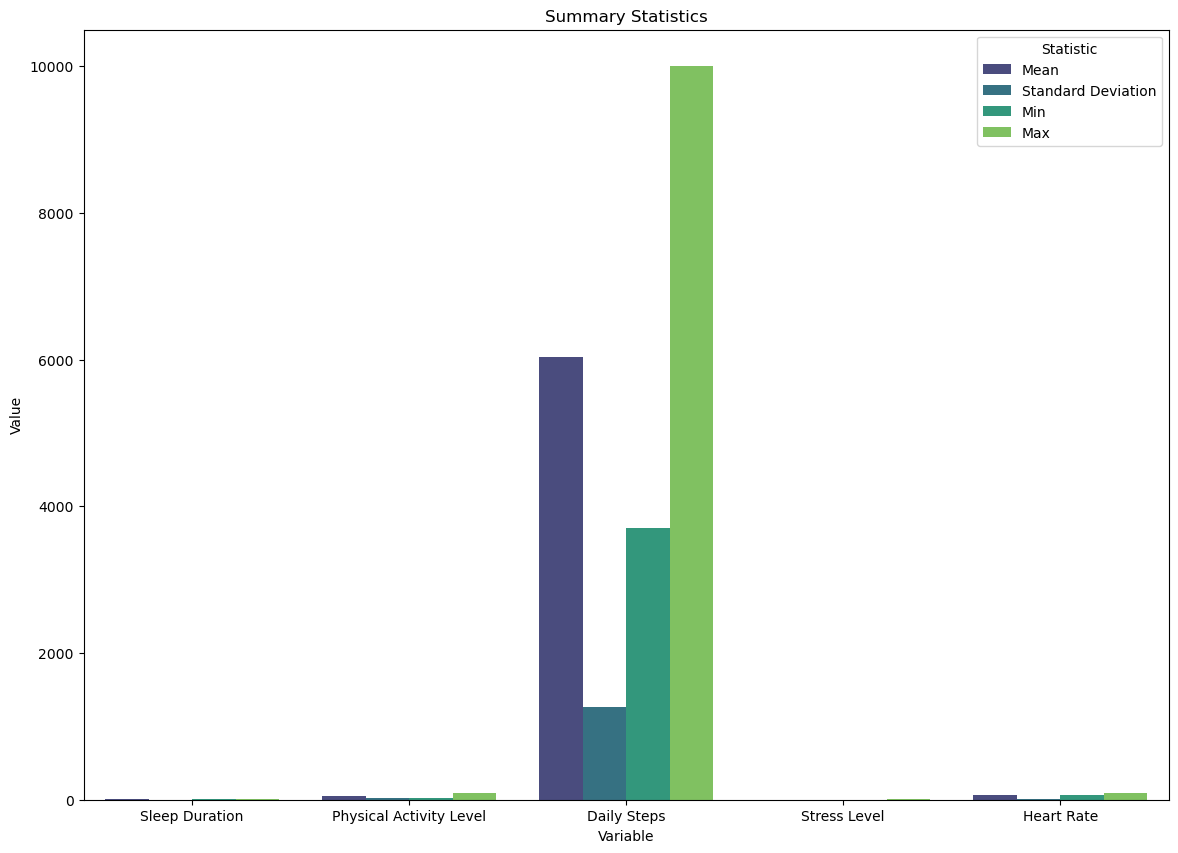

In [52]:
stats_df = pd.DataFrame({
    'Statistic': ['Mean'] * len(mean_values) + ['Standard Deviation'] * len(std_dev_values) + ['Min'] * len(min_values) + ['Max'] * len(max_values),
    'Value': list(mean_values) + list(std_dev_values) + list(min_values) + list(max_values),
    'Variable': list(mean_values.index) * 4
})

plt.figure(figsize=(14, 10))

sns.barplot(data=stats_df, x='Variable', y='Value', hue='Statistic', palette='viridis')
plt.title('Summary Statistics')
plt.ylabel('Value')
plt.legend(title='Statistic', loc='upper right')

plt.show()

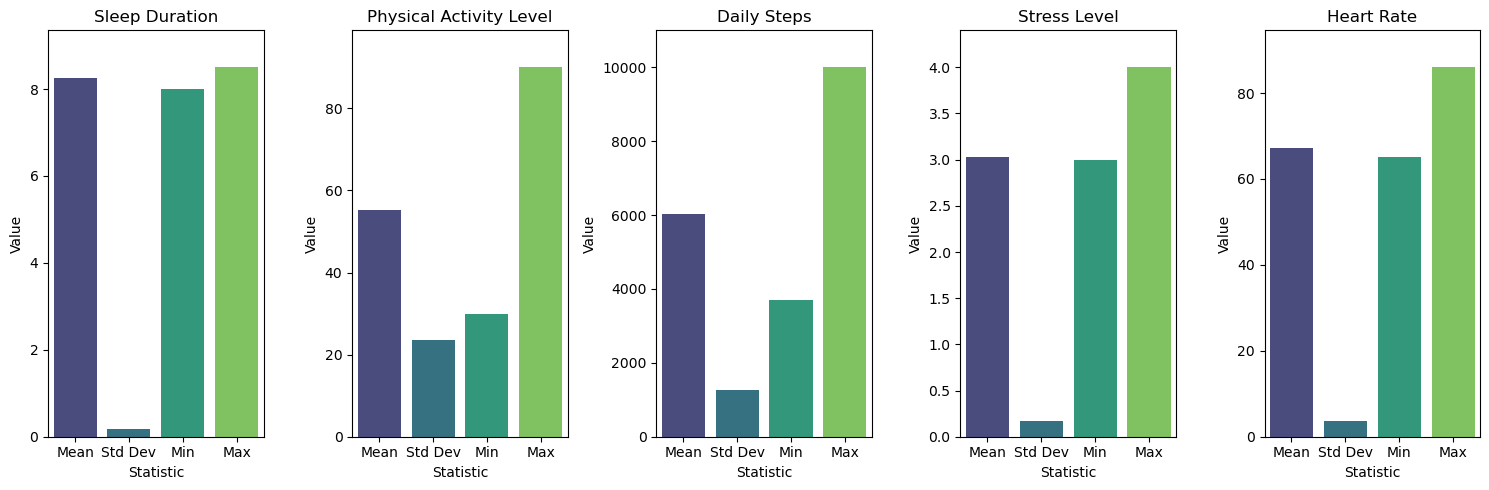

In [50]:
stats_df = pd.DataFrame({
    'Statistic': ['Mean'] * len(mean_values) + ['Std Dev'] * len(std_dev_values) + ['Min'] * len(min_values) + ['Max'] * len(max_values),
    'Value': list(mean_values) + list(std_dev_values) + list(min_values) + list(max_values),
    'Variable': list(mean_values.index) * 4
})

# Determine the unique variables
variables = stats_df['Variable'].unique()

# Calculate maximum y-values for each subplot
max_y_values = {
    variable: stats_df[stats_df['Variable'] == variable]['Value'].max() * 1.1  # Adding 10% buffer
    for variable in variables
}

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(15, 5), sharey=False)
axes = axes.flatten()

# Plot each variable in a separate subplot
for ax, variable in zip(axes, variables):
    data_to_plot = stats_df[stats_df['Variable'] == variable]
    sns.barplot(data=data_to_plot, x='Statistic', y='Value', hue='Statistic', ax=ax, palette='viridis', legend=False)
    ax.set_title(variable)
    ax.set_ylabel('Value')
    ax.set_xlabel('Statistic')
    ax.set_ylim(0, max_y_values[variable])  

plt.tight_layout()
plt.show()


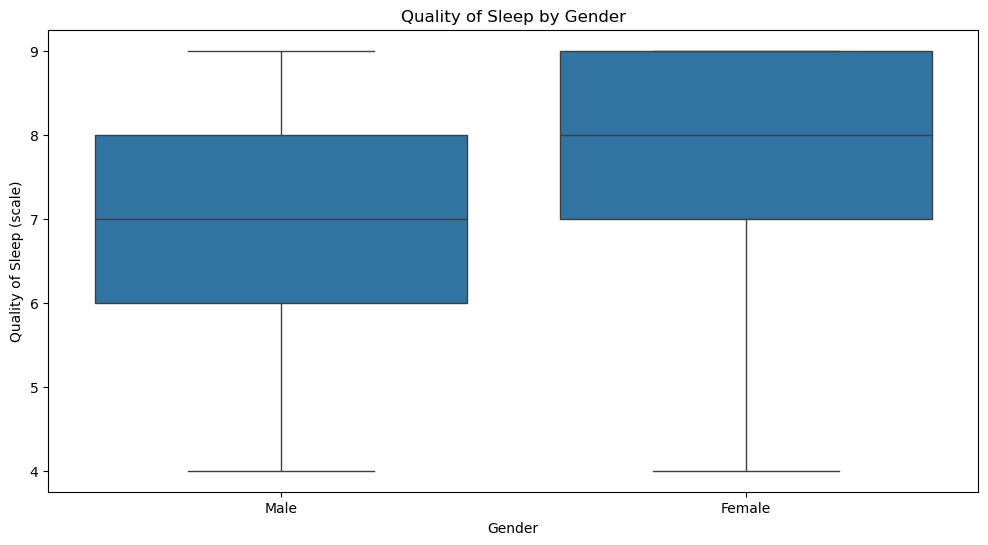

In [58]:
# Box plots by gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Quality of Sleep', data=sleep_health_data)
plt.title('Quality of Sleep by Gender')
plt.xlabel('Gender')
plt.ylabel('Quality of Sleep (scale)')
plt.show()

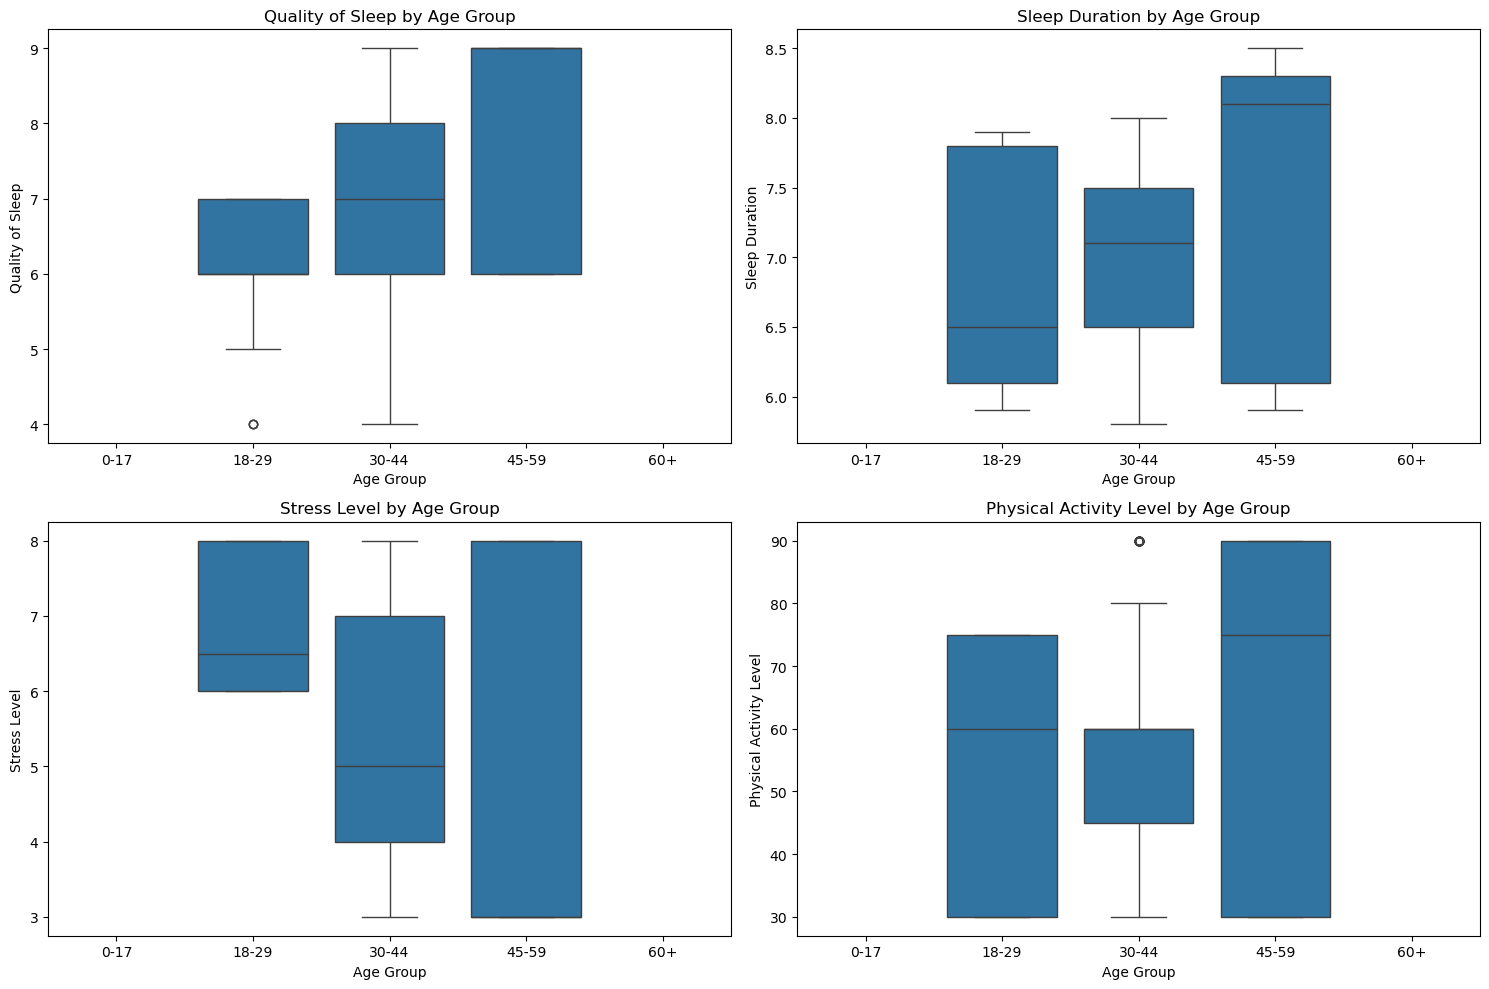

In [62]:
# Compare health outcomes by age groups
age_bins = [0, 18, 30, 45, 60, 100]
age_labels = ['0-17', '18-29', '30-44', '45-59', '60+']
sleep_health_data['age_group'] = pd.cut(sleep_health_data['Age'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(15, 10))

for i, column in enumerate(['Quality of Sleep', 'Sleep Duration', 'Stress Level', 'Physical Activity Level']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='age_group', y=column, data=sleep_health_data)
    plt.title(f'{column} by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


In [64]:
occupation_stats = sleep_health_data.groupby('Occupation')['Quality of Sleep'].describe()
print(occupation_stats)

                      count      mean       std  min  25%  50%  75%  max
Occupation                                                              
Accountant             37.0  7.891892  0.458487  7.0  8.0  8.0  8.0  9.0
Doctor                 71.0  6.647887  0.757790  6.0  6.0  7.0  7.0  9.0
Engineer               63.0  8.412698  0.754234  5.0  8.0  9.0  9.0  9.0
Lawyer                 47.0  7.893617  0.311661  7.0  8.0  8.0  8.0  8.0
Manager                 1.0  7.000000       NaN  7.0  7.0  7.0  7.0  7.0
Nurse                  72.0  7.347222  1.548827  5.0  6.0  6.0  9.0  9.0
Sales Representative    2.0  4.000000  0.000000  4.0  4.0  4.0  4.0  4.0
Salesperson            32.0  6.000000  0.000000  6.0  6.0  6.0  6.0  6.0
Scientist               4.0  5.000000  1.154701  4.0  4.0  5.0  6.0  6.0
Software Engineer       4.0  6.500000  1.914854  4.0  5.5  7.0  8.0  8.0
Teacher                40.0  6.975000  0.659740  5.0  7.0  7.0  7.0  8.0


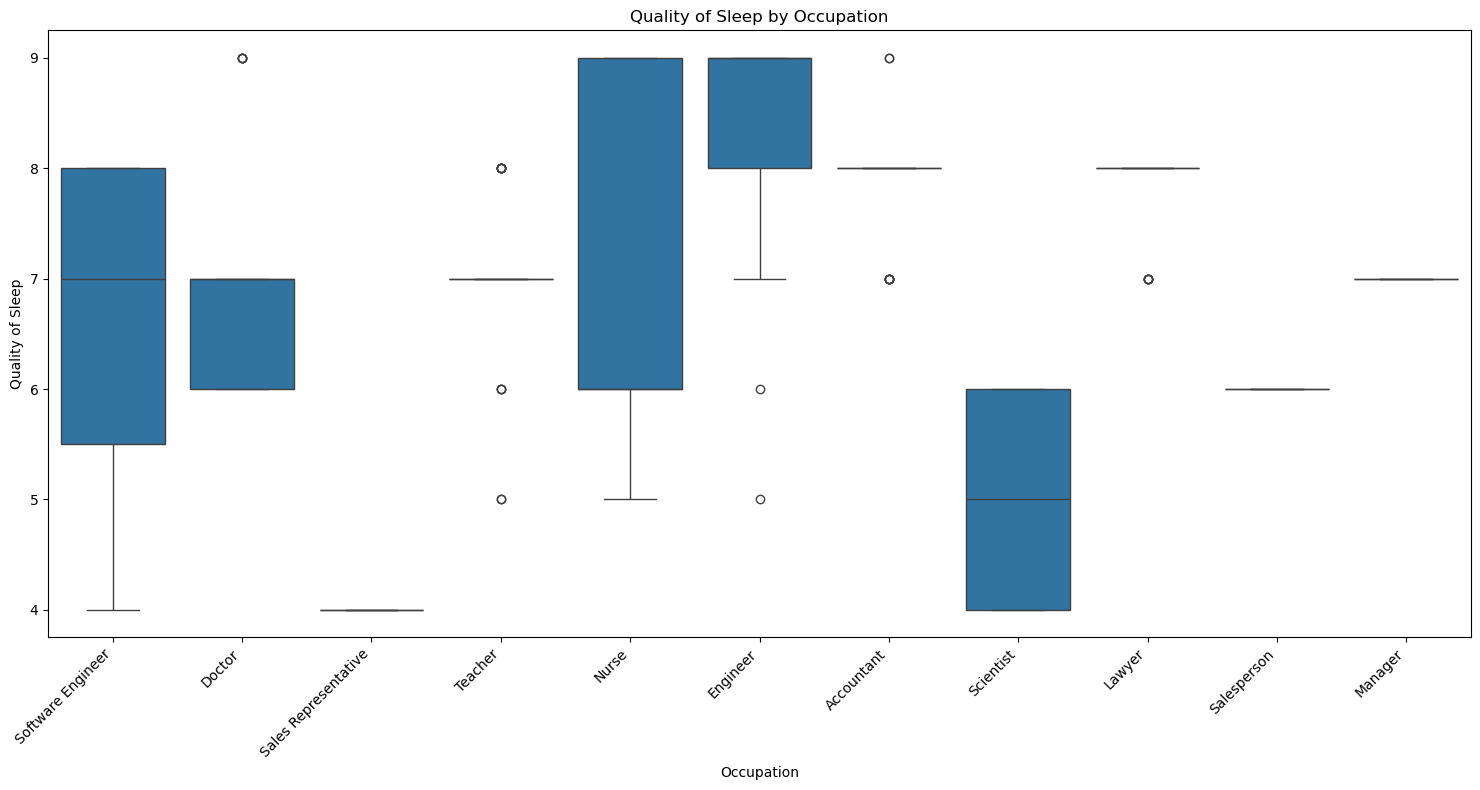

In [66]:
plt.figure(figsize=(15, 8))

# Create a box plot of quality of sleep by occupation
sns.boxplot(x='Occupation', y='Quality of Sleep', data=sleep_health_data)

plt.xticks(rotation=45, ha='right')

plt.title('Quality of Sleep by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Quality of Sleep')

plt.tight_layout()
plt.show()


Occupation
Accountant              7.891892
Doctor                  6.647887
Engineer                8.412698
Lawyer                  7.893617
Manager                 7.000000
Nurse                   7.347222
Sales Representative    4.000000
Salesperson             6.000000
Scientist               5.000000
Software Engineer       6.500000
Teacher                 6.975000
Name: Quality of Sleep, dtype: float64


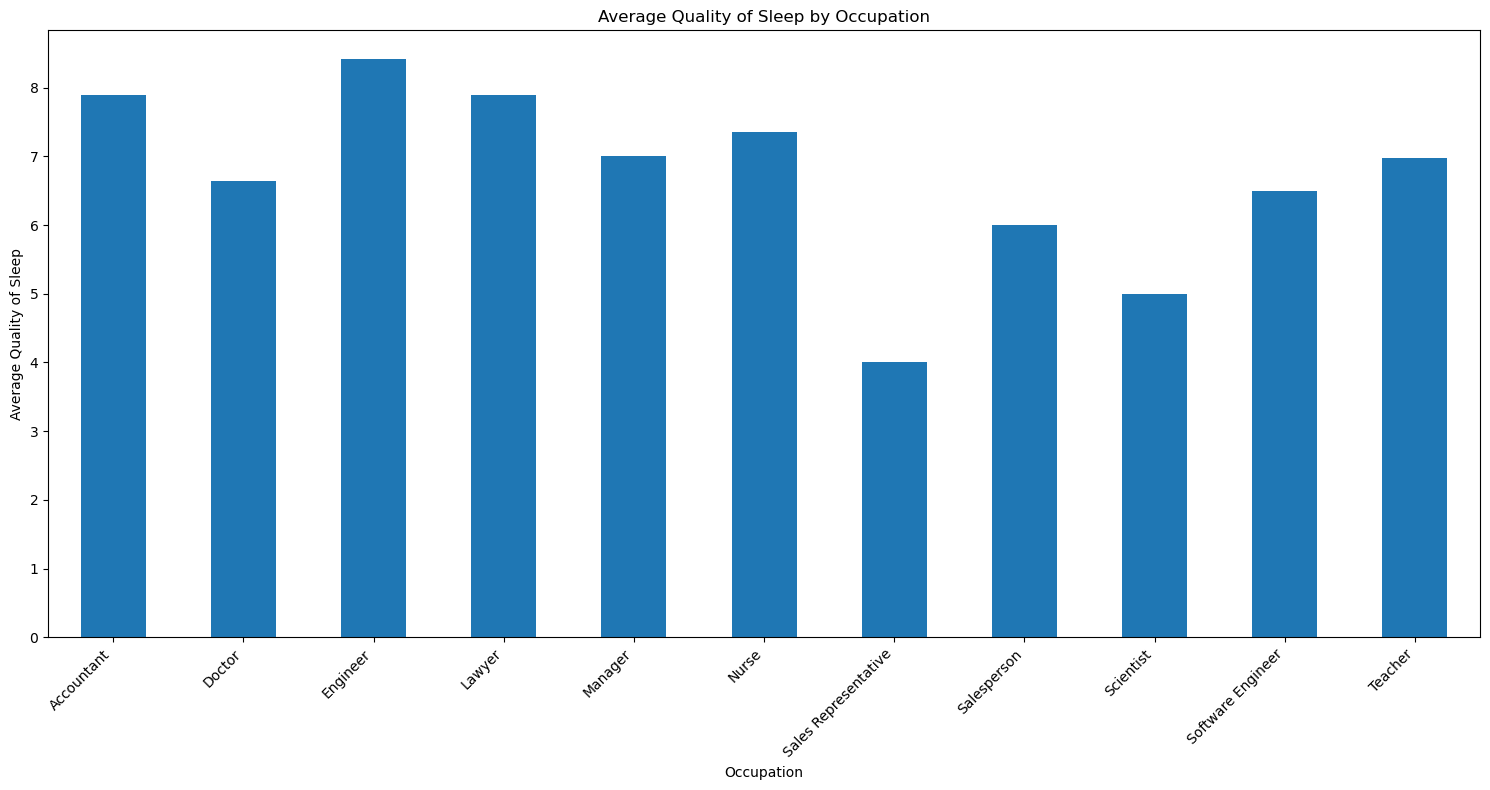

In [68]:
# Calculate average sleep quality by occupation
average_sleep_quality = sleep_health_data.groupby('Occupation')['Quality of Sleep'].mean()
print(average_sleep_quality)

plt.figure(figsize=(15, 8))
average_sleep_quality.plot(kind='bar')
plt.title('Average Quality of Sleep by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Quality of Sleep')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Occupation
Accountant              7.113514
Doctor                  6.970423
Engineer                7.987302
Lawyer                  7.410638
Manager                 6.900000
Nurse                   7.048611
Sales Representative    5.900000
Salesperson             6.403125
Scientist               6.000000
Software Engineer       6.750000
Teacher                 6.690000
Name: Sleep Duration, dtype: float64


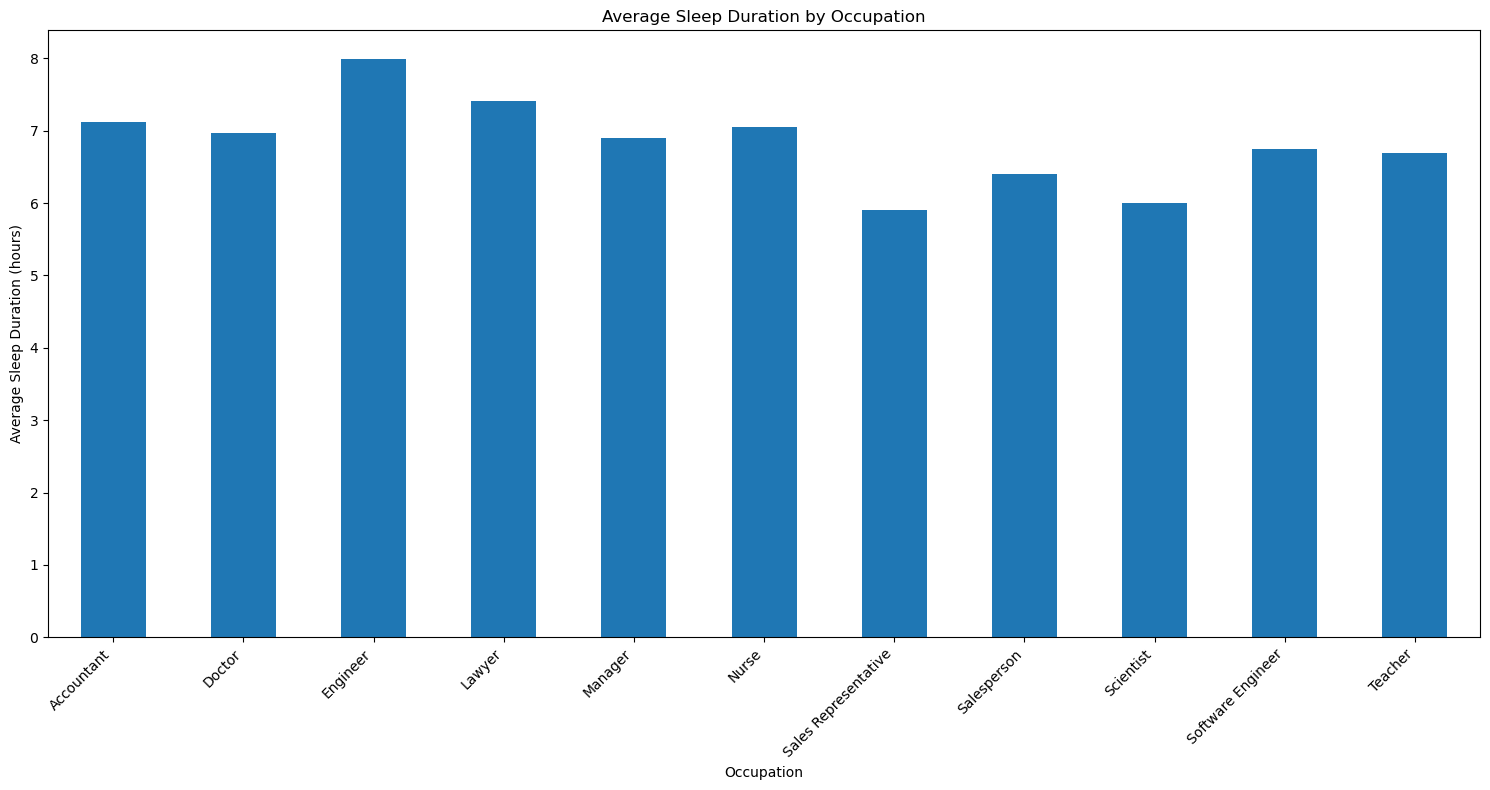

In [70]:
# Calculate average sleep duration by occupation
average_sleep_duration = sleep_health_data.groupby('Occupation')['Sleep Duration'].mean()
print(average_sleep_duration)

plt.figure(figsize=(15, 8))
average_sleep_duration.plot(kind='bar')
plt.title('Average Sleep Duration by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Sleep Duration (hours)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()